# Sample, Explore, and Clean Taxifare Dataset 

**Learning Objectives**
- Practice querying BigQuery
- Sample from large dataset in a reproducible way
- Practice exploring data using Pandas
- Identify corrupt data and clean accordingly

## Introduction
In this notebook, we will explore a dataset corresponding to taxi rides in New York City to build a Machine Learning model that estimates taxi fares. The idea is to suggest a likely fare to taxi riders so that they are not surprised, and so that they can protest if the charge is much higher than expected. Such a model would also be useful for ride-hailing apps that quote you the trip price in advance.

### Set up environment variables and load necessary libraries

In [1]:
PROJECT = "qwiklabs-gcp-636667ae83e902b6"  # Replace with your PROJECT
REGION = "us-central1"            # Choose an available region for Cloud MLE

In [2]:
import os
os.environ["PROJECT"] = PROJECT
os.environ["REGION"] = REGION

Check that the Google BigQuery library is installed and if not, install it.

In [3]:
!pip freeze | grep google-cloud-bigquery==1.6.1 || pip install google-cloud-bigquery==1.6.1

google-cloud-bigquery==1.6.1


## View data schema and size

Our dataset is hosted in [BigQuery](https://cloud.google.com/bigquery/): Google's petabyte scale, SQL queryable, fully managed cloud data warehouse. It is a publically available dataset, meaning anyone with a GCP account has access. 

1. Click [here](https://console.cloud.google.com/bigquery?project=bigquery-public-data&p=nyc-tlc&d=yellow&t=trips&page=table) to acess the dataset.
2. In the web UI, below the query editor, you will see the schema of the dataset. What fields are available, what does each mean? 
3. Click the 'details' tab. How big is the dataset?

## Preview data

Let's see what a few rows of our data looks like. Any cell that starts with `%%bigquery` will be interpreted as a SQL query that is executed on BigQuery, and the result is printed to our notebook.

BigQuery supports [two flavors](https://cloud.google.com/bigquery/docs/reference/standard-sql/migrating-from-legacy-sql#comparison_of_legacy_and_standard_sql) of SQL syntax: legacy SQL and standard SQL. The preferred is standard SQL because it complies with the official SQL:2011 standard. To instruct BigQuery to interpret our syntax as such we start the query with `#standardSQL`.

There are over 1 Billion rows in this dataset and it's 130GB large, so let's retrieve a small sample

In [4]:
%%bigquery --project $PROJECT
#standardSQL
SELECT
 *
FROM
  `nyc-tlc.yellow.trips`
WHERE RAND() < .0000001 -- sample a small fraction of the data

,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,rate_code,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,imp_surcharge,tip_amount,tolls_amount,total_amount,store_and_fwd_flag
0,VTS,2009-02-04 08:41:00+00:00,2009-02-04 08:44:00+00:00,-73.971143,40.783313,-73.972640,40.764162,None,1,1.72,CRD,6.5,0.0,NaN,NaN,1.00,0.00,7.50,None
1,CMT,2011-09-14 12:38:16+00:00,2011-09-14 12:57:04+00:00,-73.971955,40.758798,-73.996240,40.753596,1,1,2.00,CRD,10.9,0.0,0.5,NaN,2.28,0.00,13.68,N
2,VTS,2014-12-22 06:16:00+00:00,2014-12-22 06:35:00+00:00,-74.004495,40.717210,-73.861327,40.767622,1,1,12.03,CRD,33.5,0.0,0.5,NaN,7.00,0.00,41.00,None
3,VTS,2012-08-02 14:41:00+00:00,2012-08-02 14:50:00+00:00,-74.012333,40.707487,-74.002690,40.719827,1,2,1.40,CSH,6.5,0.0,0.5,NaN,0.00,0.00,7.00,None
4,VTS,2012-11-15 07:03:00+00:00,2012-11-15 07:14:00+00:00,-73.986870,40.733955,-73.960225,40.775492,1,1,3.42,CSH,12.0,0.0,0.5,NaN,0.00,0.00,12.50,None
5,CMT,2013-12-07 13:06:54+00:00,2013-12-07 13:30:20+00:00,-74.002003,40.724627,-73.958330,40.734700,1,1,5.30,CRD,21.0,0.0,0.5,NaN,4.00,0.00,25.50,N
6,DDS,2009-05-01 06:33:37+00:00,2009-05-01 06:44:28+00:00,-73.961593,40.798417,-73.968179,40.761680,None,1,3.20,CSH,9.7,0.0,NaN,NaN,0.00,0.00,9.70,None
7,CMT,2014-08-19 07:45:54+00:00,2014-08-19 07:49:44+00:00,-73.960353,40.766237,-73.964780,40.756645,1,1,0.80,CRD,5.0,0.0,0.5,NaN,1.35,0.00,6.85,N
8,VTS,2013-01-02 09:54:00+00:00,2013-01-02 09:58:00+00:00,-74.003623,40.726312,-73.995000,40.731707,1,1,0.95,CRD,5.5,0.0,0.5,NaN,1.00,0.00,7.00,None
9,CMT,2010-01-30 09:24:36+00:00,2010-01-30 09:29:48+00:00,-73.973228,40.748304,-73.954943,40.769529,1,1,1.90,No,6.5,0.0,0.5,NaN,0.00,0.00,7.00,0


### Preview data (alternate way)

Alternatively we can use BigQuery's web UI to execute queries. 

1. Open the [web UI](https://console.cloud.google.com/bigquery)
2. Paste the above query minus the `%%bigquery` part into the Query Editor
3. Click the 'Run' button or type 'CTRL + ENTER' to execute the query

Query results will be displayed below the Query editor.

## Sample data repeatably

There's one issue with using `RAND() < N` to sample. It's non-deterministic. Each time you run the query above you'll get a different sample. 

Since repeatability is key to data science, let's instead use a hash function (which is deterministic by definition) and then sample the using the modulo operation on the hashed value. 

We obtain our hash values using:

`ABS(FARM_FINGERPRINT(CAST(hashkey AS STRING)))`

Working from inside out:

- `CAST()`: Casts hashkey to string because our hash function only works on strings
- `FARM_FINGERPRINT()`: Hashes strings to 64bit integers
- `ABS()`: Takes the absolute value of the integer. This is not strictly neccesary but it makes the following modulo operations more intuitive since we don't have to account for negative remainders.* 


The `hashkey` should be:

1. Unrelated to the objective 
2. Sufficiently high cardinality

Given these properties we can sample our data repeatably using the modulo operation. 

To get a 1% sample:

`WHERE MOD(hashvalue,100) = 0`

To get a *different* 1% sample change the remainder condition, for example:

`WHERE MOD(hashvalue,100) = 55`

To get a 20% sample:

`WHERE MOD(hashvalue,100) < 20` Alternatively: `WHERE MOD(hashvalue,5) = 0`

And so forth...

We'll use `pickup_datetime` as our hash key because it meets our desired properties. If such a column doesn't exist in the data you can synthesize a hashkey by concatenating multiple columns.

Below we sample 1/5000th of the data. The syntax is admittedly less elegant than `RAND() < N`, but now each time you run the query you'll get the same result.

\**Tech note: Taking absolute value doubles the chances of hash collisions but since there are 2^64 possible hash values and less than 2^30 hash keys the collision risk is negligable.*

#### **Exercise 1**

Modify the BigQuery query above to produce a repeatable sample of the taxi fare data. 
Replace the RAND operation above with a FARM_FINGERPRINT operation that will yield a repeatable 1/5000th sample of the data.

In [5]:
%%bigquery --project $PROJECT
SELECT
 *
FROM
  `nyc-tlc.yellow.trips`
WHERE 
   MOD(ABS(FARM_FINGERPRINT(CAST(pickup_datetime AS STRING))), 5000) = 0

,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,rate_code,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,imp_surcharge,tip_amount,tolls_amount,total_amount,store_and_fwd_flag
0,CMT,2014-09-28 18:13:53+00:00,2014-09-28 18:13:55+00:00,-73.913235,40.813785,-73.913233,40.813788,1,1,0.00,NOC,2.5,0.0,0.5,NaN,0.00,0.0,3.00,N
1,CMT,2013-07-08 07:35:16+00:00,2013-07-09 00:44:58+00:00,-73.928977,40.762847,-73.951577,40.733366,1,1,0.80,DIS,2.5,0.5,0.5,NaN,0.00,0.0,3.50,N
2,CMT,2015-04-15 01:32:28+00:00,2015-04-15 01:32:35+00:00,-73.827377,40.697491,-73.827377,40.697491,1,1,0.00,CSH,2.5,0.5,0.5,0.3,0.00,0.0,3.80,N
3,CMT,2015-06-13 10:41:15+00:00,2015-06-13 10:43:48+00:00,-73.944626,40.779499,-73.950523,40.776562,1,1,0.40,CRD,4.0,0.0,0.5,0.3,0.95,0.0,5.75,N
4,CMT,2009-09-13 12:14:53+00:00,2009-09-13 12:17:58+00:00,-74.002982,40.723408,-73.997880,40.736116,None,1,1.00,CSH,4.5,0.0,NaN,NaN,0.00,0.0,4.50,N
5,VTS,2013-10-29 15:21:00+00:00,2013-10-29 15:25:00+00:00,-73.963698,40.767887,-73.957535,40.765057,1,1,0.36,CSH,4.5,0.0,0.5,NaN,0.00,0.0,5.00,None
6,VTS,2013-07-29 15:08:00+00:00,2013-07-29 15:11:00+00:00,-73.985105,40.721920,-73.994602,40.724962,1,1,0.57,CRD,4.5,0.0,0.5,NaN,0.00,0.0,5.00,None
7,VTS,2011-06-12 23:10:00+00:00,2011-06-12 23:13:00+00:00,-73.954103,40.770493,-73.944278,40.780252,1,2,0.97,CSH,4.5,0.5,0.5,NaN,0.00,0.0,5.50,None
8,CMT,2011-07-10 01:50:44+00:00,2011-07-10 01:54:36+00:00,-73.979193,40.776699,-73.987781,40.779450,1,1,0.80,CRD,4.5,0.5,0.5,NaN,1.00,0.0,6.50,N
9,VTS,2015-02-09 21:40:03+00:00,2015-02-09 21:43:25+00:00,-73.955528,40.768490,-73.947647,40.775173,1,2,0.54,CSH,4.5,0.5,0.5,0.3,0.00,0.0,5.80,N


## Load sample into Pandas dataframe

The advantage of querying BigQuery directly as opposed to the web UI is that we can supplement SQL analysis with Python analysis. A popular Python library for data analysis on structured data is [Pandas](https://pandas.pydata.org/), and the primary data strucure in Pandas is called a DataFrame.

To store BigQuery results in a Pandas DataFrame we have have to query the data with a slightly differently syntax.

1. Import the `google.cloud` bigquery module
2. Create a variable called `bq` which contains the BigQuery Client
2. Store the desired SQL query as a Python string
3. Execute `bq.query(query_string).to_dataframe()` where `query_string` is what you created in the previous step

**This will take about a minute**

*Tip: Use triple quotes for a multi-line string in Python*

*Tip: You can measure execution time of a cell by starting that cell with `%%time`*

#### **Exercise 2**

Store the results of the query you created in the previous TODO above in a Pandas DataFrame called `trips`.
You will need to import the `bigquery` module from Google Cloud and store the query as a string before executing the query. Then,
- Create a variable called `bq` which contains the BigQuery Client
- Copy/paste the query string from above
- Use the BigQuery Client to execute the query and save it to a Pandas dataframe 

In [6]:
from google.cloud import bigquery

In [7]:
from google.cloud import bigquery
bq = bigquery.Client()

query_string = """
SELECT
 *
FROM
  `nyc-tlc.yellow.trips`
WHERE 
   MOD(ABS(FARM_FINGERPRINT(CAST(pickup_datetime AS STRING))), 5000) = 0
"""

trips = bq.query(query_string).to_dataframe()

## Explore datafame

In [8]:
print(type(trips))
trips.head()

<class 'pandas.core.frame.DataFrame'>


,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,rate_code,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,imp_surcharge,tip_amount,tolls_amount,total_amount,store_and_fwd_flag
0,VTS,2011-06-30 07:40:00+00:00,2011-06-30 07:40:00+00:00,-73.884263,40.740518,-73.884728,40.740383,1,6,0.04,CSH,2.5,0.0,0.5,NaN,0.0,0.0,3.0,None
1,CMT,2014-03-15 09:40:01+00:00,2014-03-15 09:40:17+00:00,-73.938468,40.798441,-73.938468,40.798441,1,1,0.00,CSH,2.5,0.0,0.5,NaN,0.0,0.0,3.0,N
2,VTS,2013-12-05 08:42:00+00:00,2013-12-05 08:42:00+00:00,-74.007547,40.705772,0.000000,0.000000,1,1,0.00,CRD,2.5,0.0,0.5,NaN,10.0,0.0,13.0,None
3,CMT,2012-12-11 22:05:56+00:00,2012-12-11 22:06:54+00:00,-73.965952,40.752789,-73.962854,40.758175,1,1,0.30,CSH,3.5,0.5,0.5,NaN,0.0,0.0,4.5,N
4,CMT,2014-06-10 19:00:36+00:00,2014-06-10 19:03:23+00:00,-73.954648,40.774188,-73.958596,40.771349,1,1,0.30,CSH,4.0,1.0,0.5,NaN,0.0,0.0,5.5,N


The Python variable `trips` is now a Pandas DataFrame. The `.head()` function above prints the first 5 rows of a DataFrame. 

The rows in the DataFrame may be in a different order than when using `%%bq query`, but the data is the same.

It would be useful to understand the distribution of each of our columns, which is to say the mean, min, max, standard deviation etc..

A DataFrame's `.describe()` method provides this. By default it only analyzes numeric columns. To include stats about non-numeric column use `describe(include='all')`.

In [9]:
trips.describe(include='all')

,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,rate_code,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,imp_surcharge,tip_amount,tolls_amount,total_amount,store_and_fwd_flag
count,228767,228767,228767,228767.000000,228767.000000,228765.000000,228765.000000,191897,228767.000000,228767.000000,228767,228767.000000,228767.000000,199111.000000,16206.000000,228767.000000,228767.00000,228767.000000,114058
unique,3,35604,139577,NaN,NaN,NaN,NaN,8,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,VTS,2011-01-08 23:16:00+00:00,2011-06-11 21:54:00+00:00,NaN,NaN,NaN,NaN,1,NaN,NaN,CSH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
freq,118533,345,38,NaN,NaN,NaN,NaN,187562,NaN,NaN,110766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102759
first,NaN,2009-01-01 02:49:07+00:00,2009-01-01 02:56:49+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-06-30 21:10:18+00:00,2015-06-30 21:33:12+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,-72.494534,39.898827,-72.501581,39.920191,NaN,1.698422,2.829812,NaN,11.075905,0.298234,0.496208,0.298149,1.084627,0.21548,13.129380,NaN
std,NaN,NaN,NaN,13.197600,11.720138,12.851044,7.495178,NaN,1.319614,3.451099,NaN,8.991663,0.353389,0.046695,0.023962,1.941511,1.08037,10.787732,NaN
min,NaN,NaN,NaN,-3021.189647,-3111.327772,-2220.060632,-854.037120,NaN,0.000000,0.000000,NaN,-52.000000,-1.000000,-1.000000,-0.300000,-1.500000,0.00000,-52.500000,NaN
25%,NaN,NaN,NaN,-73.992023,40.734907,-73.991462,40.734019,NaN,1.000000,1.020000,NaN,6.000000,0.000000,0.500000,0.300000,0.000000,0.00000,7.100000,NaN


## Distribution analysis

Do you notice anything off about the data? Pay attention to `min` and `max`. Latitudes should be between -90 and 90, and longitudes should be between -180 and 180, so clearly some of this data is bad.

Further more some trip fares are negative and some passenger counts are 0 which doesn't seem right. We'll clean this up later.

## Investigate trip distance

Looks like some trip distances are 0 as well, let's investigate this.

In [10]:
trips[trips["trip_distance"] == 0][:10] # first 10 rows with trip_distance == 0

,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,rate_code,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,imp_surcharge,tip_amount,tolls_amount,total_amount,store_and_fwd_flag
1,CMT,2014-03-15 09:40:01+00:00,2014-03-15 09:40:17+00:00,-73.938468,40.798441,-73.938468,40.798441,1,1,0.0,CSH,2.5,0.0,0.5,NaN,0.00,0.0,3.00,N
2,VTS,2013-12-05 08:42:00+00:00,2013-12-05 08:42:00+00:00,-74.007547,40.705772,0.000000,0.000000,1,1,0.0,CRD,2.5,0.0,0.5,NaN,10.00,0.0,13.00,None
289,VTS,2010-09-22 17:31:00+00:00,2010-09-22 17:33:00+00:00,-73.954375,40.774360,-73.960210,40.763448,4,1,0.0,CSH,3.3,1.0,0.5,NaN,0.00,0.0,4.80,None
450,CMT,2010-12-14 00:47:15+00:00,2010-12-14 00:47:51+00:00,-73.946222,40.781917,-73.946357,40.781715,2,1,0.0,CRD,45.0,0.0,0.5,NaN,9.50,0.0,55.00,N
550,VTS,2010-10-05 09:22:00+00:00,2010-10-05 09:24:00+00:00,0.000000,0.000000,0.000000,0.000000,3,1,0.0,CRD,17.5,0.0,0.0,NaN,77.50,0.0,95.00,None
558,CMT,2009-04-29 15:30:35+00:00,2009-04-29 15:30:47+00:00,-73.998545,40.735023,-73.998545,40.735023,None,1,0.0,CSH,2.5,0.0,NaN,NaN,0.00,0.0,2.50,N
563,CMT,2015-03-25 19:24:08+00:00,2015-03-25 19:24:13+00:00,0.000000,0.000000,0.000000,0.000000,1,1,0.0,NOC,2.5,1.0,0.5,0.3,0.00,0.0,4.30,N
921,CMT,2011-04-23 11:56:16+00:00,2011-04-23 11:59:48+00:00,-73.981231,40.729158,-73.985922,40.722664,1,3,0.0,CSH,3.7,0.0,0.5,NaN,0.00,0.0,4.20,N
1186,VTS,2011-09-21 13:57:00+00:00,2011-09-21 13:58:00+00:00,-73.983698,40.721555,-73.983667,40.721537,1,1,0.0,CRD,2.5,0.0,0.5,NaN,4.00,0.0,7.00,None
1345,CMT,2011-02-24 09:54:37+00:00,2011-02-24 10:00:00+00:00,-73.959674,40.771241,-73.947285,40.776156,1,1,0.0,CRD,4.9,0.0,0.5,NaN,0.75,0.0,6.15,N


It appears that trips are being charged substantial fares despite having 0 distance. 

Let's graph `trip_distance` vs `fare_amount` using the Pandas [`.plot()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) method to corroborate.

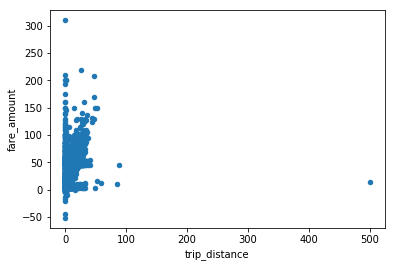

In [11]:
%matplotlib inline
trips.plot(x = "trip_distance", y = "fare_amount", kind = "scatter")

It appears that we have a lot of invalid data that is being coded as zero distance and some fare amounts that are definitely illegitimate. Let's remove them from our analysis. We can do this by modifying the BigQuery query to keep only trips longer than zero miles and fare amounts that are at least the minimum cab fare ($2.50).

## Identify correct label

Should we use `fare_amount` or `total_amount` as our label? What's the difference?

To make this clear let's look at some trips that included a toll.

#### **Exercise 3**

Use the pandas DataFrame indexing to look at a subset of the trips dataframe created above where the `tolls_amount` is positive.

**Hint**: You can index the dataframe over values which have `trips['tolls_amount'] > 0`.

In [12]:
tolls = trips[trips['tolls_amount'] > 0]
tolls.head()

,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,rate_code,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,imp_surcharge,tip_amount,tolls_amount,total_amount,store_and_fwd_flag
84,CMT,2013-01-21 10:14:09+00:00,2013-01-21 10:34:07+00:00,-73.862985,40.768572,-73.972247,40.757208,1,1,10.70,CRD,31.0,0.0,0.5,NaN,5.00,4.80,41.30,N
88,VTS,2014-06-08 20:05:00+00:00,2014-06-08 20:50:00+00:00,-73.790172,40.644257,-73.975162,40.750085,2,2,17.51,CRD,52.0,0.0,0.5,NaN,11.47,5.33,69.30,None
94,VTS,2012-12-16 23:17:00+00:00,2012-12-16 23:40:00+00:00,-73.870867,40.773755,-73.953092,40.772582,1,5,8.39,CSH,26.5,0.5,0.5,NaN,0.00,4.80,32.30,None
243,VTS,2014-12-02 11:22:00+00:00,2014-12-02 11:56:00+00:00,-73.871127,40.773910,-73.972828,40.756452,1,6,10.25,CRD,34.0,0.0,0.5,NaN,7.87,5.33,47.70,None
244,VTS,2013-03-09 13:56:00+00:00,2013-03-09 14:46:00+00:00,-73.987990,40.733657,-73.794032,40.644627,2,2,16.98,CRD,52.0,0.0,0.5,NaN,0.00,5.33,57.83,None


What do you see looking at the samples above? Does `total_amount` always reflect the `fare amount` + `tolls_amount` + `tip`? Why would there be a discrepancy?

To account for this, we will use the sum of `fare_amount` and `tolls_amount`

In [13]:
discrep = tolls[tolls['total_amount'] != (tolls['fare_amount'] + tolls['tip_amount'] + tolls['tolls_amount'] + tolls['mta_tax'] + tolls['extra'])]

In [14]:
len(tolls)

9494

In [15]:
len(discrep)

2623

In [16]:
discrep.head()

,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,rate_code,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,imp_surcharge,tip_amount,tolls_amount,total_amount,store_and_fwd_flag
243,VTS,2014-12-02 11:22:00+00:00,2014-12-02 11:56:00+00:00,-73.871127,40.773910,-73.972828,40.756452,1,6,10.25,CRD,34.0,0.0,0.5,NaN,7.87,5.33,47.70,None
277,CMT,2012-03-30 21:23:16+00:00,2012-03-30 21:34:17+00:00,-73.985697,40.727067,-73.958453,40.743486,1,1,3.30,CSH,10.1,0.5,0.5,NaN,0.00,4.80,15.90,N
453,VTS,2013-09-20 08:22:00+00:00,2013-09-20 08:54:00+00:00,-73.981302,40.749652,-73.861575,40.768230,1,1,9.53,CRD,33.5,0.0,0.5,NaN,7.77,5.33,47.10,None
454,VTS,2015-04-26 11:19:07+00:00,2015-04-26 11:53:36+00:00,-73.975571,40.761677,-74.177216,40.694973,3,1,17.83,CSH,67.5,0.0,0.0,0.3,0.00,16.75,84.55,N
527,CMT,2009-06-19 04:29:53+00:00,2009-06-19 04:41:15+00:00,-73.974087,40.747293,-73.872775,40.774541,None,1,8.30,CSH,19.3,0.0,NaN,NaN,0.00,4.15,23.45,N


In [17]:
trips['target'] = trips['tolls_amount'] + trips['fare_amount']

## Select useful fields

What fields do you see that may be useful in modeling taxifare? They should be

1. Related to the objective
2. Available at prediction time 

**Related to the objective**

For example we know `passenger_count` shouldn't have any affect on fare because fare is calculated by time and distance. Best to eliminate it to reduce the amount of noise in the data and make the job of the ML algorithm easier.

If you're not sure whether a column is related to the objective, err on the side of keeping it and let the ML algorithm figure out whether it's useful or not. 

**Available at prediction time** 

For example `trip_distance` is certainly related to the objective, but we can't know the value until a trip is completed (depends on the route taken), so it can't be used for prediction. 

**We will use the following** 

`pickup_datetime`, `pickup_longitude`, `pickup_latitude`, `dropoff_longitude`, and `dropoff_latitude`.

In [18]:
trips.columns.tolist()

['vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'rate_code',
 'passenger_count',
 'trip_distance',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'imp_surcharge',
 'tip_amount',
 'tolls_amount',
 'total_amount',
 'store_and_fwd_flag',
 'target']

## Clean the data

We need to do some clean-up of the data:

- Filter to latitudes and longitudes that are reasonable for NYC
    - the pickup longitude and dropoff_longitude should lie between -70 degrees and -78 degrees
    - the pickup_latitude and dropoff_latitude should lie between 37 degrees and 45 degrees
- We shouldn't include fare amounts less than $2.50
- Trip distances and passenger counts should be non-zero
- Have the label reflect the sum of fare_amount and tolls_amount

Let's change the BigQuery query appropriately, and only return the fields we'll use in our model.

In [19]:
%%bigquery --project $PROJECT
#standardSQL
SELECT
    (tolls_amount + fare_amount) AS fare_amount, -- create label that is the sum of fare_amount and tolls_amount
    pickup_datetime,
    pickup_longitude, 
    pickup_latitude, 
    dropoff_longitude, 
    dropoff_latitude
FROM
    `nyc-tlc.yellow.trips`
WHERE
    -- Clean Data
    trip_distance > 0
    AND passenger_count > 0  
    AND fare_amount >= 2.5
    AND pickup_latitude > 37
    AND pickup_latitude < 45
    AND pickup_longitude > -78
    AND pickup_longitude < -70
    AND dropoff_latitude > 37
    AND dropoff_latitude < 45
    AND dropoff_longitude > -78
    AND dropoff_longitude < -70
    
    -- create a repeatable 1/5000th sample
    AND MOD(ABS(FARM_FINGERPRINT(CAST(pickup_datetime AS STRING))), 5000) = 1

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,2.50,2009-04-09 11:39:00+00:00,-73.968222,40.765383,-73.968255,40.765235
1,3.00,2014-03-16 16:52:00+00:00,-73.965965,40.794857,-73.968460,40.791497
2,17.00,2013-07-13 08:29:02+00:00,-73.976362,40.751972,-74.009268,40.701627
3,19.00,2014-10-31 20:18:00+00:00,-74.000398,40.737597,-73.985790,40.762902
4,21.00,2012-11-08 09:42:06+00:00,-73.990790,40.727705,-73.963796,40.774286
5,34.33,2013-12-09 15:03:00+00:00,-73.990950,40.749772,-73.870807,40.774070
6,32.00,2013-11-04 21:00:00+00:00,-73.789880,40.647292,-73.947785,40.672352
7,43.33,2013-04-11 12:10:00+00:00,-73.885329,40.773059,-74.015036,40.714103
8,52.00,2014-04-21 14:34:00+00:00,-73.968003,40.791367,-73.959880,40.790287
9,32.50,2015-06-18 14:21:04+00:00,-73.873085,40.774162,-73.996437,40.725491


In [20]:
filtered_q = """SELECT
    (tolls_amount + fare_amount) AS fare_amount, -- create label that is the sum of fare_amount and tolls_amount
    pickup_datetime,
    pickup_longitude, 
    pickup_latitude, 
    dropoff_longitude, 
    dropoff_latitude
FROM
    `nyc-tlc.yellow.trips`
WHERE
    -- Clean Data
    trip_distance > 0
    AND passenger_count > 0  
    AND fare_amount >= 2.5
    AND pickup_latitude > 37
    AND pickup_latitude < 45
    AND pickup_longitude > -78
    AND pickup_longitude < -70
    AND dropoff_latitude > 37
    AND dropoff_latitude < 45
    AND dropoff_longitude > -78
    AND dropoff_longitude < -70
    
    -- create a repeatable 1/5000th sample
    AND MOD(ABS(FARM_FINGERPRINT(CAST(pickup_datetime AS STRING))), 5000) = 1"""

In [55]:
bq = bigquery.Client()
filtered_trips = bq.query(filtered_q).to_dataframe()

We now have a repeatable and clean sample we can use for modeling taxi fares. 

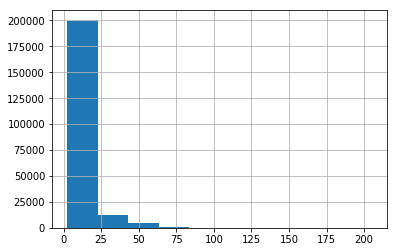

In [56]:
filtered_trips['fare_amount'].hist()

In [57]:
filtered_trips['manhattan_dist'] = abs(filtered_trips['pickup_latitude'] - filtered_trips['dropoff_latitude']) + abs(filtered_trips['pickup_longitude'] - filtered_trips['dropoff_longitude'])

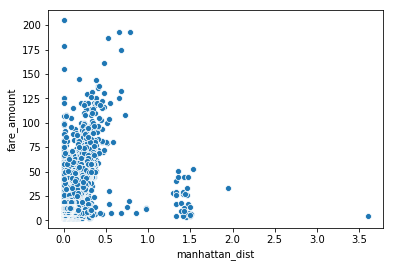

In [58]:
import seaborn as sns
sns.scatterplot(filtered_trips['manhattan_dist'], filtered_trips['fare_amount'])

In [59]:
filtered_trips[filtered_trips['fare_amount'] > 100].head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,manhattan_dist
70,120.00,2013-11-16 00:23:00+00:00,-73.784070,40.646277,-74.032647,40.753742,0.356042
849,116.33,2014-05-14 08:12:00+00:00,-73.896725,40.749410,-74.285422,40.653787,0.484320
1730,125.33,2015-03-04 20:36:48+00:00,-74.035469,40.941177,-74.035469,40.941181,0.000004
1945,120.00,2011-02-23 22:48:17+00:00,-73.972236,40.759590,-73.857512,41.063710,0.418844
2468,108.10,2010-07-28 21:47:43+00:00,-73.977840,40.753741,-74.449053,40.498601,0.726353


In [60]:
filtered_trips.sort_values('manhattan_dist', ascending=False).head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,manhattan_dist
47314,4.50,2012-01-27 00:00:00+00:00,-73.963777,40.774442,-73.955372,44.366667,3.600630
4160,32.83,2014-04-13 05:16:00+00:00,-75.202622,40.133347,-73.893083,40.765995,1.942187
28752,52.90,2009-11-06 15:53:38+00:00,-73.137393,41.366138,-73.994378,40.690107,1.533016
169451,6.10,2009-06-11 17:49:11+00:00,-73.137393,41.366138,-73.997079,40.721409,1.504415
176274,13.70,2009-09-06 01:05:12+00:00,-73.137393,41.366138,-74.001698,40.727741,1.502702
201133,5.70,2010-05-16 01:37:56+00:00,-73.137393,41.366138,-74.009065,40.739580,1.498230
186000,4.90,2010-05-18 15:23:50+00:00,-73.137393,41.366138,-73.989688,40.726288,1.492145
144800,7.30,2009-10-26 16:39:28+00:00,-73.137393,41.366138,-73.989783,40.735113,1.483415
13543,17.30,2009-09-12 18:38:11+00:00,-73.994639,40.746307,-73.137393,41.366138,1.477077
11660,45.00,2009-02-09 14:13:09+00:00,-73.137393,41.366138,-73.991346,40.749930,1.470161


In [61]:
filtered_trips.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
manhattan_dist                   float64
dtype: object

In [62]:
filtered_trips['date'] = filtered_trips['pickup_datetime'].dt.date
filtered_trips['time'] = filtered_trips['pickup_datetime'].dt.time

In [63]:
import geopandas
import pandas as pd

In [64]:
filtered_trips['day of week'] = pd.to_datetime(filtered_trips['date']).dt.day_name()

In [65]:
filtered_trips.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,manhattan_dist,date,time,day of week
0,17.00,2014-07-25 20:53:00+00:00,-73.948320,40.779060,-73.986280,40.726450,0.090570,2014-07-25,20:53:00,Friday
1,17.00,2015-06-03 16:24:17+00:00,-74.017273,40.704926,-73.991714,40.744801,0.065434,2015-06-03,16:24:17,Wednesday
2,21.00,2013-08-01 19:48:27+00:00,-73.992488,40.747920,-73.973107,40.691743,0.075558,2013-08-01,19:48:27,Thursday
3,32.33,2014-02-20 21:10:20+00:00,-73.989235,40.754169,-73.849359,40.728332,0.165713,2014-02-20,21:10:20,Thursday
4,29.00,2013-06-18 14:38:32+00:00,-73.983354,40.738925,-74.008761,40.711008,0.053324,2013-06-18,14:38:32,Tuesday


In [66]:
days = filtered_trips['day of week'].unique()
for day in days:
    print (day)
    print (filtered_trips[filtered_trips['day of week'] == day]['fare_amount'].describe())

Friday
count    31880.000000
mean        11.558013
std          9.692269
min          2.500000
25%          6.100000
50%          8.500000
75%         12.900000
max        125.580000
Name: fare_amount, dtype: float64
Wednesday
count    30475.000000
mean        11.259786
std          9.431497
min          2.500000
25%          6.100000
50%          8.500000
75%         12.500000
max        161.500000
Name: fare_amount, dtype: float64
Thursday
count    33320.000000
mean        11.437325
std          9.490504
min          2.500000
25%          6.100000
50%          8.500000
75%         12.900000
max        192.570000
Name: fare_amount, dtype: float64
Tuesday
count    30236.000000
mean        11.066222
std          9.232914
min          2.500000
25%          6.000000
50%          8.100000
75%         12.500000
max        130.290000
Name: fare_amount, dtype: float64
Sunday
count    28770.000000
mean        11.319367
std          9.666504
min          2.500000
25%          6.000000
50%      

Copyright 2019 Google Inc.
Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at
http://www.apache.org/licenses/LICENSE-2.0
Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

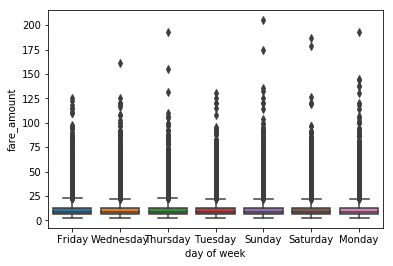

In [67]:
sns.boxplot(x=filtered_trips['day of week'], y=filtered_trips['fare_amount'])

In [68]:
filtered_trips['pickup_loc'] = geopandas.points_from_xy(filtered_trips['pickup_longitude'], filtered_trips['pickup_latitude'])
filtered_trips['dropoff_loc'] = geopandas.points_from_xy(filtered_trips['dropoff_longitude'], filtered_trips['dropoff_latitude'])

In [69]:
filtered_trips['pickup_datetime'].max()

Timestamp('2015-06-30 23:57:04+0000', tz='UTC')

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [71]:
filtered_trips['hour'] = filtered_trips['pickup_datetime'].dt.hour

In [72]:
filtered_trips.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,manhattan_dist,date,time,day of week,pickup_loc,dropoff_loc,hour
0,17.00,2014-07-25 20:53:00+00:00,-73.948320,40.779060,-73.986280,40.726450,0.090570,2014-07-25,20:53:00,Friday,POINT (-73.94832 40.77906),POINT (-73.98627999999999 40.72645),20
1,17.00,2015-06-03 16:24:17+00:00,-74.017273,40.704926,-73.991714,40.744801,0.065434,2015-06-03,16:24:17,Wednesday,POINT (-74.01727294921875 40.70492553710938),POINT (-73.99171447753906 40.74480056762695),16
2,21.00,2013-08-01 19:48:27+00:00,-73.992488,40.747920,-73.973107,40.691743,0.075558,2013-08-01,19:48:27,Thursday,POINT (-73.99248799999999 40.74792),POINT (-73.973107 40.691743),19
3,32.33,2014-02-20 21:10:20+00:00,-73.989235,40.754169,-73.849359,40.728332,0.165713,2014-02-20,21:10:20,Thursday,POINT (-73.98923499999999 40.754169),POINT (-73.84935900000001 40.728332),21
4,29.00,2013-06-18 14:38:32+00:00,-73.983354,40.738925,-74.008761,40.711008,0.053324,2013-06-18,14:38:32,Tuesday,POINT (-73.98335400000001 40.738925),POINT (-74.00876100000001 40.711008),14


In [73]:
# RMSE to beat is 6.28 from min_fare + linear function of manhattan distance

In [74]:
numeric_features = ['manhattan_dist', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'hour']
categorical_features = ['day of week']

In [75]:
enc_cols = {}
for feat in categorical_features:
    enc = pd.get_dummies(filtered_trips[feat])
    filtered_trips = pd.concat([filtered_trips, enc], axis=1)
    enc_cols[feat] = enc.columns.tolist()
    del filtered_trips[feat]

In [52]:
lr = LinearRegression()

In [76]:
enc_cols

{'day of week': ['Friday',
  'Monday',
  'Saturday',
  'Sunday',
  'Thursday',
  'Tuesday',
  'Wednesday']}

In [78]:
use_cols = numeric_features
for feat in categorical_features:
    for col in enc_cols[feat]:
        print(col)
        use_cols.append(col)

Friday
Monday
Saturday
Sunday
Thursday
Tuesday
Wednesday


In [79]:
use_cols

['manhattan_dist',
 'pickup_latitude',
 'pickup_longitude',
 'dropoff_latitude',
 'dropoff_longitude',
 'hour',
 'Friday',
 'Monday',
 'Saturday',
 'Sunday',
 'Thursday',
 'Tuesday',
 'Wednesday']

In [81]:
target = filtered_trips['fare_amount'] 
features = filtered_trips[use_cols]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3)

In [82]:
X_train.head()

,manhattan_dist,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,hour,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
88292,0.046392,40.770065,-73.991419,40.737525,-74.005271,23,0,0,0,0,0,0,1
198430,0.054973,40.726194,-73.998030,40.762818,-73.979681,19,1,0,0,0,0,0,0
109370,0.037500,40.784400,-73.981200,40.758000,-73.970100,23,1,0,0,0,0,0,0
172307,0.033120,40.783349,-73.955107,40.758485,-73.963363,15,0,1,0,0,0,0,0
159440,0.004858,40.728147,-73.988017,40.724460,-73.989188,3,1,0,0,0,0,0,0


In [83]:
lr = LinearRegression()

In [84]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
y_hat = lr.predict(X_train)

In [88]:
lr.coef_

array([ 1.39563874e+02, -5.85248499e+00,  9.19521372e+00, -2.29289580e+01,
        3.61186945e+00,  7.53962880e-03,  1.99515140e-01, -1.56272030e-01,
       -7.69288994e-02, -3.38376505e-01,  1.85668396e-01,  6.71725481e-02,
        1.19221350e-01])

In [89]:
lr.intercept_

2125.2903394437126

In [100]:
import numpy as np
import math

In [101]:
math.sqrt(np.mean((y_hat - y_train)**2))

5.322456664923443

In [102]:
yhat_test = lr.predict(X_test)
rmse_test = math.sqrt(np.mean((yhat_test - y_test)**2))
print(rmse_test)

5.221052601339164
